# Monkey ECoG Data looking at the CV

Goal: 
examine the difference in coefficient varience to look at the differences between each states.

## 1. Set Up

In [2]:
import numpy as np
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'

Grabbing data

In [3]:
def setdata(session_num,chan):
    data_path = "\\Users\\Lauren\\Data\\20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128\\Session%d\\" %(session_num)
    matfile = io.loadmat(data_path + 'ECoG_ch%d.mat'%(chan), squeeze_me=True)
    timefile = io.loadmat(data_path + 'Condition.mat', squeeze_me=True)
    if session_num == 3:
        print(timefile['ConditionLabel'])
        print(timefile['ConditionIndex'])
    data = matfile['ECoGData_ch%d'%(chan)]
    return data

In [4]:
def setTimeFile(session_num):
    data_path = "\\Users\\Lauren\\Data\\20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128\\Session%d\\" %(session_num)
    timefile = io.loadmat(data_path + 'Condition.mat', squeeze_me=True)
    return timefile

In [6]:
#plt.imshow(np.log10(spg))
# PSD = np.mean(spg,axis = 1)
# PST = np.std(spg,axis=1)
def s1cv(timefile):
    SP1 = spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][0]),np.where(f_time<timefile['ConditionTime'][1]))]
    SP2 = spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][2]),np.where(f_time<timefile['ConditionTime'][3]))]
    plt.figure(1)
    plt.loglog((np.std(SP1,axis=1)/np.mean(SP1,axis=1))**2)
    plt.loglog((np.std(SP2,axis=1)/np.mean(SP2,axis=1))**2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('CV')
#plt.loglog(np.mean(SP1,axis=1))
#plt.figure(figsize=(15,5))
#plt.imshow(np.log10(spg[:,:1000]))

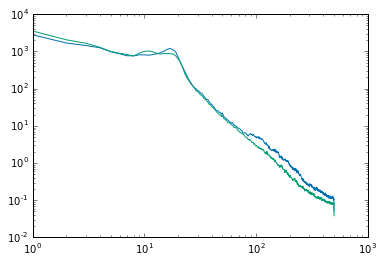

In [8]:
f_axis, f_time, spg = sig.spectrogram(data, fs=1000., nperseg=1000, noverlap=500)
plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][0]),np.where(f_time<timefile['ConditionTime'][1]))],axis=1))
plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][2]),np.where(f_time<timefile['ConditionTime'][3]))],axis=1))

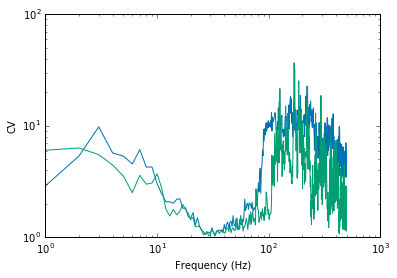

In [9]:
data = setdata(1,1)
timefile = setTimeFile(1)
s1cv(timefile = timefile)

In [28]:
def psd(data,timefile,num):
    f_axis, f_time, spg = sig.spectrogram(data, fs=1000., nperseg=1000, noverlap=500)
    plt.figure(num+1)
    if num == 1:
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][0]),np.where(f_time<timefile['ConditionTime'][1]))],axis=1))
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][2]),np.where(f_time<timefile['ConditionTime'][3]))],axis=1))
    elif (num == 2):
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][1]),np.where(f_time<timefile['ConditionTime'][2]))],axis=1))
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][3]),np.where(f_time<timefile['ConditionTime'][4]))],axis=1))
    elif num == 3:
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][0]),np.where(f_time<timefile['ConditionTime'][1]))],axis=1))

Grabbing Data from session 2

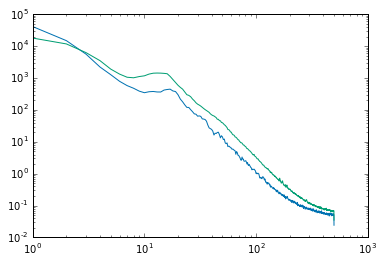

In [11]:
data = setdata(2,1)
timefile = setTimeFile(2)
f_axis, f_time, spg = sig.spectrogram(data, fs=1000., nperseg=1000, noverlap=500)
plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][0]),np.where(f_time<timefile['ConditionTime'][1]))],axis=1))
plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][2]),np.where(f_time<timefile['ConditionTime'][3]))],axis=1))

In [12]:
def s2cv(timefile):
    SP1 = spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][1]),np.where(f_time<timefile['ConditionTime'][2]))]
    SP2 = spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][3]),np.where(f_time<timefile['ConditionTime'][4]))]
    plt.loglog((np.std(SP1,axis=1)/np.mean(SP1,axis=1))**2)
    plt.loglog((np.std(SP2,axis=1)/np.mean(SP2,axis=1))**2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('CV')

In [25]:
def s3cv(timefile):
    SP1 = spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][0]),np.where(f_time<timefile['ConditionTime'][1]))]
    plt.figure(1)
    plt.loglog((np.std(SP1,axis=1)/np.mean(SP1,axis=1))**2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('CV')

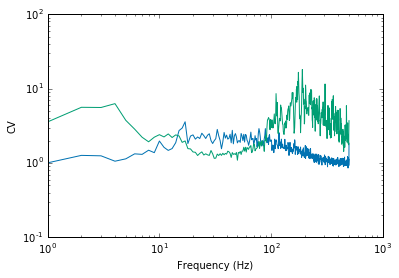

In [14]:
data = setdata(2,1)
timefile = setTimeFile(2)
s2cv(timefile)

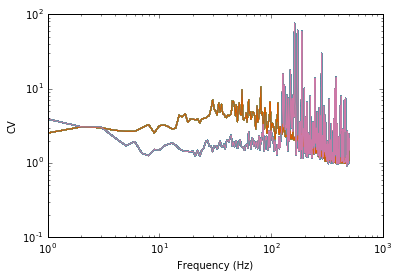

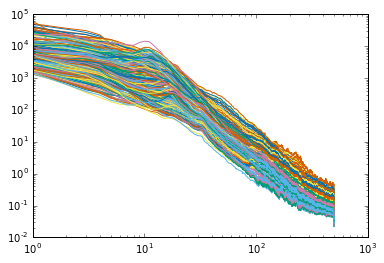

In [33]:
for i in range(1,129):
    data = setdata(1,i)
    timefile = setTimeFile(1)
    s1cv(timefile = timefile)
    psd(data,timefile,1)

In [16]:
data_path = "\\Users\\Lauren\\Data\\20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128\\Session1\\" 
matfile = io.loadmat(data_path + 'ECoG_ch2.mat', squeeze_me=True)
timefile = io.loadmat(data_path + 'Condition.mat', squeeze_me=True)
print(timefile['ConditionLabel'])
print(timefile['ConditionIndex'])
data = matfile['ECoGData_ch2']

['AwakeEyesOpened-Start' 'AwakeEyesOpened-End' 'AwakeEyesClosed-Start'
 'AwakeEyesClosed-End']
[  12279  908909 1007108 1927428]


In [ ]:
# ch_63 is corrupted in session 2
for i in range(1,62) and range(64,129):
    data = setdata(2,i)
    timefile = setTimeFile(2)
    s2cv(timefile = timefile)
for i in range(1,62) and range(64,129):
    data = setdata(2,i)
    timefile = setTimeFile(2)
    psd(data,timefile,2)

['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1277812]
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']
[  38506 1

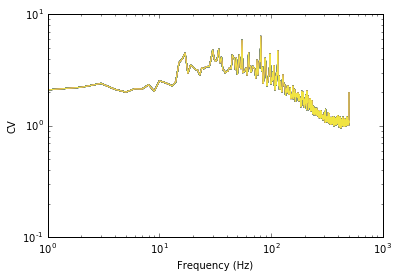

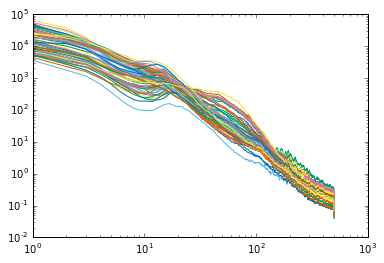

In [30]:
for i in range(1,62) and range(64,129):
    data = setdata(3,i)
    timefile = setTimeFile(3)
    s3cv(timefile = timefile)
    psd(data,timefile,3)